In [1]:
import mxnet as mx 
from symbol import get_resnet_model
from symbol import YOLO_loss
from data_ulti import get_iterator

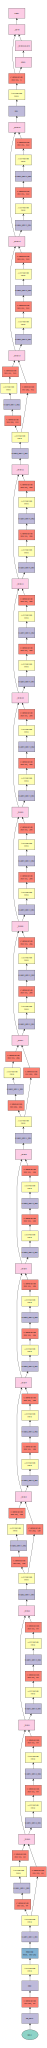

In [2]:
# get sym 
sym = get_resnet_model('pretrained_models/resnet-34', 0)
_, args_params, aux_params = mx.model.load_checkpoint('pretrained_models/resnet-34', 0)
logit = sym.get_internals()['logit_output']
mx.viz.plot_network(logit)

In [3]:
# get some input 
train_data = mx.io.ImageRecordIter(path_imgrec='DATA_rec/cat_small.rec',
                                 data_shape=(3,224,224),
                                 label_width=7*7*5, 
                                 batch_size=1,)
val_data = mx.io.ImageRecordIter(path_imgrec='DATA_rec/cat_small.rec',
                                 data_shape=(3,224,224),
                                 label_width=7*7*5, 
                                 batch_size=1,)

In [4]:
mod = mx.mod.Module(symbol=sym, context=mx.gpu(0))

In [5]:
mod.bind(train_data.provide_data, train_data.provide_label)

In [6]:
mod.init_params(allow_missing=True, arg_params=args_params, aux_params=aux_params, 
                initializer=mx.init.Xavier(magnitude=2,rnd_type='gaussian',factor_type='in'))

In [7]:
out = mod.predict(eval_data=train_data, num_batch=1)

In [8]:
out

[
 [[[[ 0.19123714  0.22679697 -0.07509609  0.22595827 -0.45678303]
    [ 0.4757207   0.13704252 -0.55509663  0.1124535  -0.51192278]
    [ 0.61306256 -0.2361089  -0.50042099 -0.60354465 -0.60833132]
    [ 0.61336076  0.26696625 -0.20968263 -0.60182285 -0.54962134]
    [ 0.49526286  0.49339277  0.61023897 -0.44047675 -0.01034993]
    [ 0.29841125  0.23165616  0.58735847 -0.1522243   0.02888049]
    [ 0.57285768 -0.39603844  0.56398618  0.05280607 -0.33932906]]
 
   [[-0.09269528  0.25893641 -0.15271464 -0.22613432 -0.59806931]
    [ 0.4804655  -0.32130927 -0.61604792 -0.04773025 -0.70733774]
    [ 0.7187084   0.23856515 -0.66474015  0.50174677 -0.65658981]
    [ 0.7702474   0.4434813  -0.33473274  0.58790135 -0.60374904]
    [ 0.74238312  0.64069247  0.6232053   0.58229679 -0.4512789 ]
    [ 0.66354352  0.64940935  0.63674456  0.42607674 -0.63041109]
    [ 0.59582776 -0.2810894   0.3514713   0.51140231 -0.57784647]]
 
   [[-0.21389212  0.30182433 -0.12706369 -0.35857973 -0.63519216]
  